# LAB

In [5]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [6]:
boston = load_boston()

In [7]:
data = pd.DataFrame(boston.data,columns = boston['feature_names'])

In [8]:
data['MEDV'] = boston['target']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


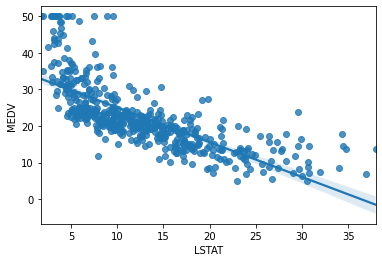

In [9]:
sns.regplot(data['LSTAT'],data['MEDV'])

In [10]:
# est = smf.ols(y ~ x,data)
est = smf.ols('MEDV ~ LSTAT',data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        01:52:48   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


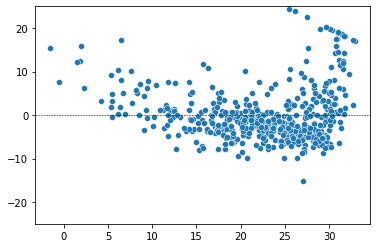

In [11]:
#dist of residuals
plt.ylim(-25,25)
sns.scatterplot(est.fittedvalues,est.resid)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')

# Multiple Regression

In [12]:
string_cols = ' + '.join(data.columns[:-1])
est = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        01:52:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [13]:
#removing AGE and INDUS
string_cols = ' + '.join(data.columns[:-1].difference(['AGE','INDUS']))
est = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          5.54e-137
Time:                        01:52:48   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

# Interaction term

In [14]:
est = smf.ols('MEDV ~ LSTAT*AGE',data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           4.86e-88
Time:                        01:52:48   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [15]:
#adding power term
tmp = data.copy()
tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~ LSTAT + LSTAT_2',data = tmp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.56e-112
Time:                        01:52:48   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8620      0.872     49.149      0.0

In [16]:
#adding power term
# tmp = data.copy()
# tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~ np.power(LSTAT,5)',data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     73.35
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           1.32e-16
Time:                        01:52:48   Log-Likelihood:                -1805.9
No. Observations:                 506   AIC:                             3616.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.6291      0

# Qualitative predictors

In [17]:
carseats = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\carseats.csv')
print(carseats.shape)
carseats.head()

FileNotFoundError: ignored

In [ ]:
est = smf.ols('Sales ~ ShelveLoc',data = carseats).fit()
print(est.summary())

#  we can see that 